In [1]:
import gensim
from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE
import re
import matplotlib

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
stopword_file ='long_stopwords'

In [8]:
stop_words = []

with open(stopword_file,'r') as inpFile:
    lines = inpFile.readlines()
    stop_words_temp = map(lambda x : re.sub('\n','',x),lines)
    stop_words = list(map(lambda x:  re.sub('[^A-Za-z0-9]+', '',x), stop_words_temp))

In [10]:
def clean(word):
    word = word.strip()
    word = word.lower()
    word = re.sub('[^A-Za-z0-9]+', '', word)
    if word not in stop_words:
        return word
    else:
        return ''

In [11]:
line_count = 0
sentences = []

with open('dataset','r') as inpFile:
    x = inpFile.readlines()
    for line in x:
         if line is not None or line != '\n':
            words = line.split()
            words = map(lambda x: clean(x), words)
            words = list(filter(lambda x:True if len(x) > 0 else False, words))
            sentences.append(words)
            

In [13]:
sentences[100:110]

[['anbarivan', 'nl'],
 [],
 ['ii'],
 [],
 [],
 ['contents'],
 [],
 ['contents', 'iv'],
 [],
 ['list', 'figures', 'ix']]

In [14]:
model = Word2Vec(sentences, window=5, size=500, workers=4, min_count=5)

In [15]:
labels = []
tokens = []

for word in model.wv.vocab:
    tokens.append(model[word])
    labels.append(word)


/home/abu/gpu/lib/python3.5/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


In [16]:
tsne_model = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)

In [17]:
new_values = tsne_model.fit_transform(tokens)

In [18]:
x = []
y = []
for value in new_values:
    x.append(value[0])
    y.append(value[1])

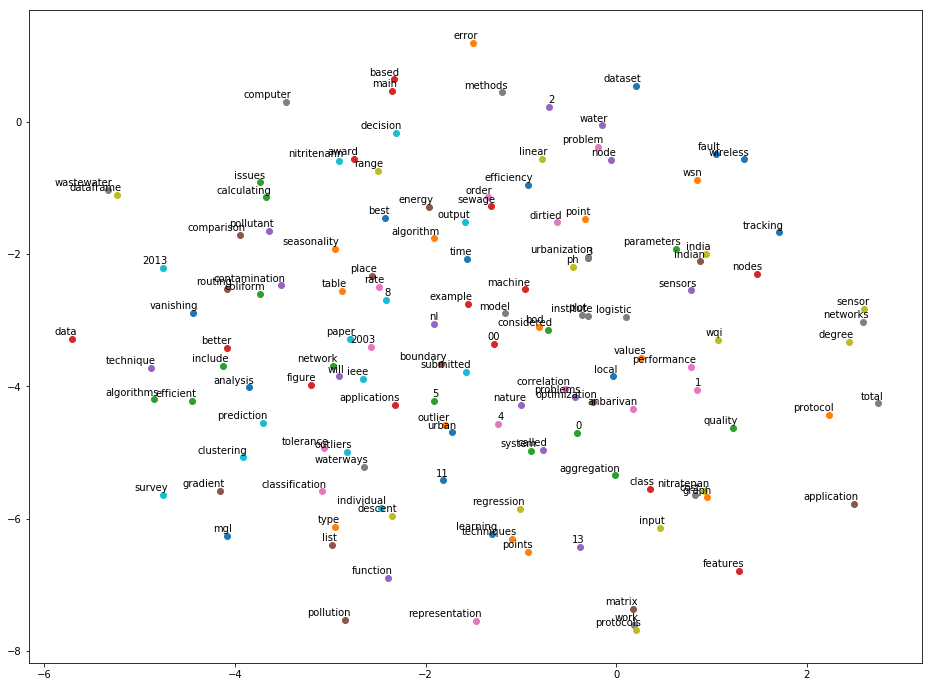

In [19]:
plt.figure(figsize=(16, 12)) 
for i in range(len(x)):
    plt.scatter(x[i],y[i])
    plt.annotate(labels[i],
                 xy=(x[i], y[i]),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')
plt.show()

In [25]:
model.most_similar(positive=['prediction','classification'],negative=['sensor'])

/home/abu/gpu/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('technique', 0.1313563734292984),
 ('clustering', 0.10603813827037811),
 ('vanishing', 0.10322518646717072),
 ('algorithms', 0.10219798237085342),
 ('4', 0.08935476839542389),
 ('tolerance', 0.08819989114999771),
 ('point', 0.0877520889043808),
 ('boundary', 0.08710546791553497),
 ('plot', 0.08172239363193512),
 ('award', 0.08090497553348541)]

In [26]:
model.most_similar(positive=['water','pollution'],negative=['time'])

/home/abu/gpu/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('data', 0.12734514474868774),
 ('tracking', 0.12280044704675674),
 ('better', 0.11811932921409607),
 ('problems', 0.11699829250574112),
 ('algorithms', 0.1144561842083931),
 ('descent', 0.11438367515802383),
 ('2', 0.1086653470993042),
 ('contamination', 0.10858283191919327),
 ('ieee', 0.10729581862688065),
 ('output', 0.09556347131729126)]

In [28]:
model.most_similar(positive=['sensor','nodes'],negative=['matrix'])

/home/abu/gpu/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('performance', 0.15946906805038452),
 ('india', 0.14322598278522491),
 ('calculating', 0.14193421602249146),
 ('networks', 0.13908149302005768),
 ('decision', 0.13620352745056152),
 ('pollutant', 0.13387750089168549),
 ('protocol', 0.13113047182559967),
 ('machine', 0.12514598667621613),
 ('wsn', 0.11453018337488174),
 ('indian', 0.1135537326335907)]